# Task 4 - Part I

$$x_{n+1} = rx_{n}(1 - x_{n}), n \in \mathbb{N}$$

## Logistic map and illustration

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### We need to evaluate this function for a given range of r values. Also we need to show the trajectories of the points. Chaotic systems are highly vulnerable due to the given initial data points.

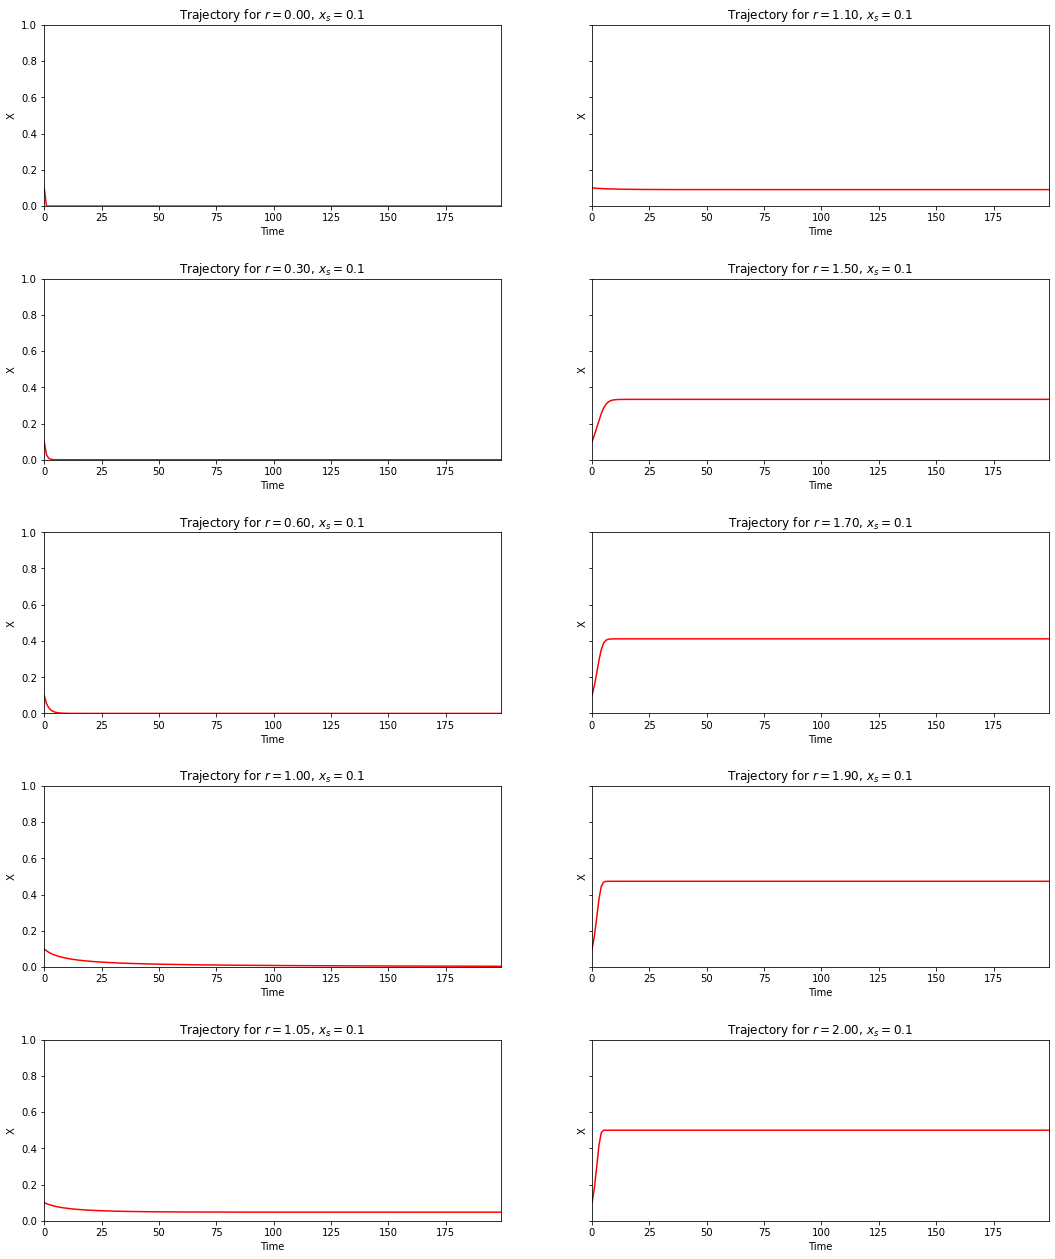

In [3]:
# Logistic function
def logistic_map(r, x):
    return r * x * (1 - x)

def logistic_map_traj(x_s, r, iteration, ax=None):
    # All data points
    data = []
    # All discrete time values
    time = []
    
    # initially we start at time = 0 and initial x is passed as x_s
    t = 0
    x = x_s
    
    # Iterate about some arbitrary number(iteration)
    
    for i in range(iteration):
        data.append(x)
        time.append(t)
        
        # Increment time
        t += 1
        
        # Evaluate the function at the current time step
        x = logistic_map(r, x)
        
    ax.plot(time, data, 'r')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, time.pop())
    ax.set_xlabel('Time')
    ax.set_ylabel('X')
    ax.set_title(f"Trajectory for $r={r:.2f}, \, x_s={x_s:.1f}$")
    
fig, axs = plt.subplots(5, 2, figsize=(18, 22), sharey=True)
plt.subplots_adjust(hspace=0.4)

# r between 0 and 2

logistic_map_traj(0.1, 0.0, 200, ax=axs[0, 0])
logistic_map_traj(0.1, 0.3, 200, ax=axs[1, 0])
logistic_map_traj(0.1, 0.6, 200, ax=axs[2, 0])
logistic_map_traj(0.1, 1.0, 200, ax=axs[3, 0])
logistic_map_traj(0.1, 1.05, 200, ax=axs[4, 0])
logistic_map_traj(0.1, 1.1, 200, ax=axs[0, 1])
logistic_map_traj(0.1, 1.5, 200, ax=axs[1, 1])
logistic_map_traj(0.1, 1.7, 200, ax=axs[2, 1])
logistic_map_traj(0.1, 1.9, 200, ax=axs[3, 1])
logistic_map_traj(0.1, 2.0, 200, ax=axs[4, 1])

### As we can observe, for differrent r values, system converges to the logistic curve i.e for r = 1.7, x = 0.4. For r between 2 and 4 :

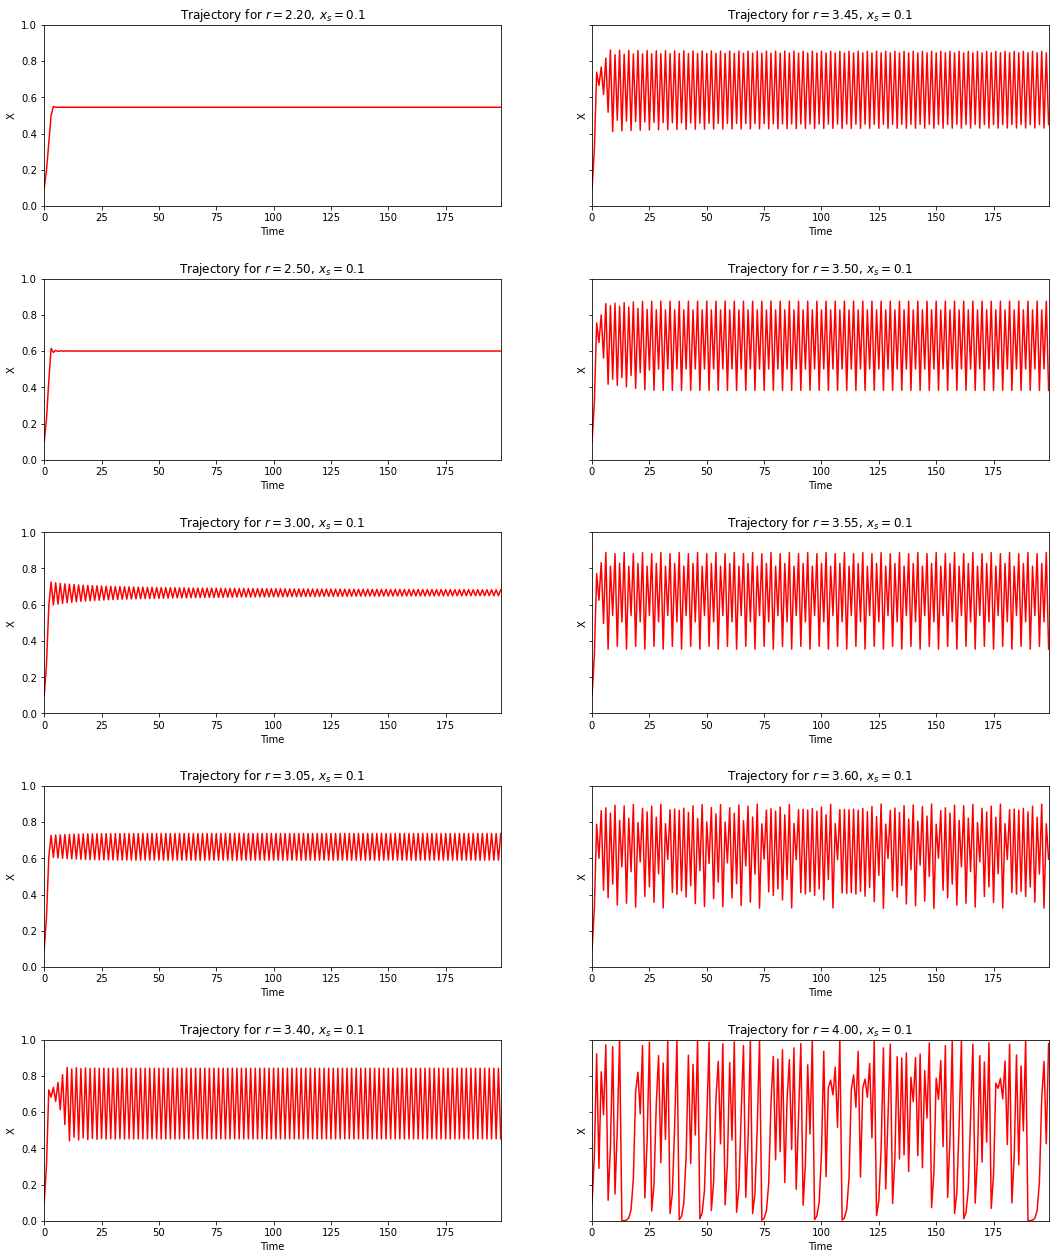

In [5]:
fig, axs = plt.subplots(5, 2, figsize=(18, 22), sharey=True)
plt.subplots_adjust(hspace=0.4)

# Varying from 2 to 4.
logistic_map_traj(0.1, 2.2, 200, ax=axs[0, 0])
logistic_map_traj(0.1, 2.5, 200, ax=axs[1, 0])
logistic_map_traj(0.1, 3.0, 200, ax=axs[2, 0])
logistic_map_traj(0.1, 3.05, 200, ax=axs[3, 0])
logistic_map_traj(0.1, 3.4, 200, ax=axs[4, 0])
logistic_map_traj(0.1, 3.45, 200, ax=axs[0, 1])
logistic_map_traj(0.1, 3.5, 200, ax=axs[1, 1])
logistic_map_traj(0.1, 3.55, 200, ax=axs[2, 1])
logistic_map_traj(0.1, 3.6, 200, ax=axs[3, 1])
logistic_map_traj(0.1, 4.0, 200, ax=axs[4, 1])



## First let's see some orbits on the logistic map and with an x=y line. 

In [14]:
def logistic_map(r, x_curr):
    return r * x_curr * (1 - x_curr)

Text(0.5, 1.0, 'Bifurcation Diagram\n')

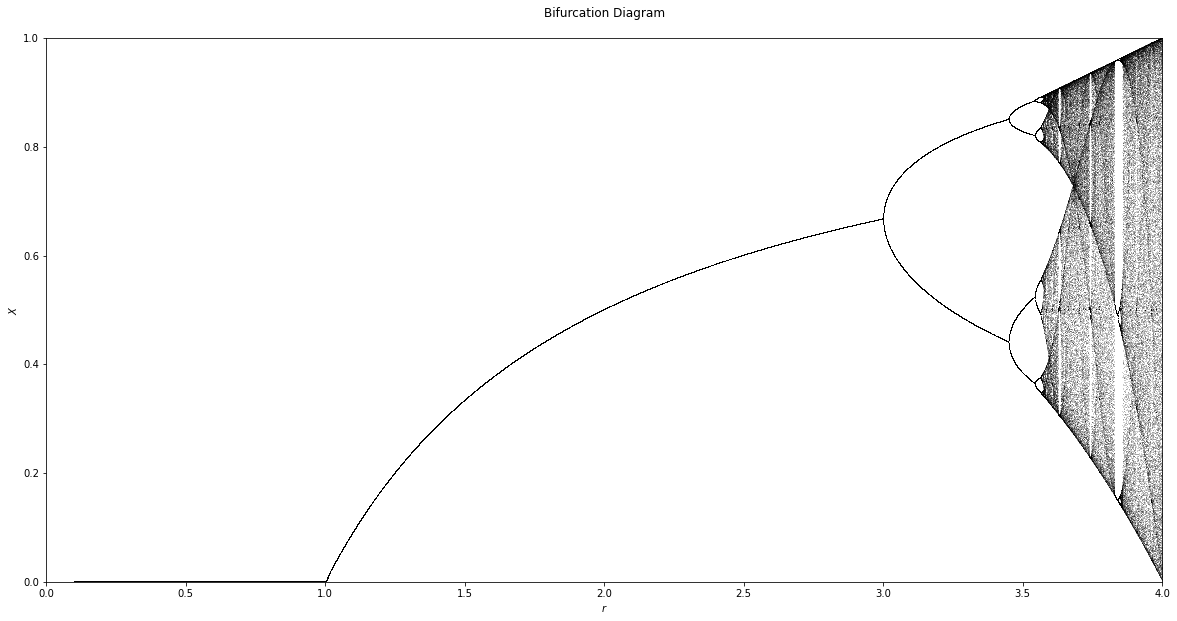

In [15]:
fig, ax0 = plt.subplots(1, 1, figsize=(20, 10))

n = 10000
r = np.linspace(0.1, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)

for i in range(iterations):
    x = logistic_map(r, x)

    if i >= (iterations - last):
        ax0.plot(r, x, ',k', alpha=0.2)
    
ax0.set_xlim(0, 4)
ax0.set_ylim(0, 1)
ax0.set_xlabel("$r$")
ax0.set_ylabel("$X$")
ax0.set_title("Bifurcation Diagram\n")

# Task 4 - Part 2

## Lorenz attactor visualization

Formula here

Euclidian distance extended 1 limit after 0.2262 seconds from the simulation execution


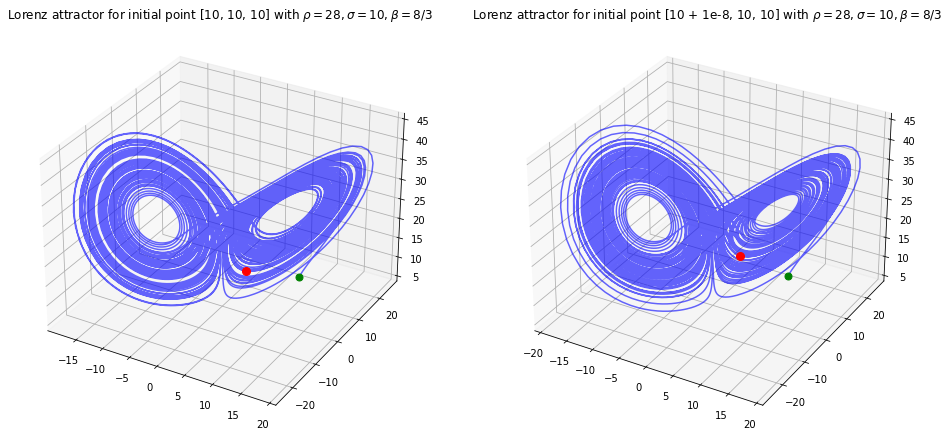

In [10]:
from scipy.integrate import odeint
from scipy.spatial import distance

# Predefined parameter values
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

simulations = []

def f(state, t):
    global rho, sigma, beta
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

# Distance function for given points. Computes the euclidian distance.
def distance_func(x1, y1, z1, x2, y2, z2):
    p1 = (x1, y1, z1)
    p2 = (x2, y2, z2)
    
    return distance.euclidean(p1, p2)

def simulation(r, s, b, time = np.arange(0.0, 100, 0.01), st_init=[10, 10, 10], ax=None):
    
    global rho, sigma, beta
    rho = r
    sigma = s
    beta = b
    
    states = odeint(f, st_init, time)
    simulations.append(states)

    ax.plot(states[:, 0], states[:, 1], states[:, 2], color='b', alpha=0.6)

    # Starting point for the first case [10, 10, 10]
    ax.plot([st_init[0]], [st_init[1]], [st_init[2]], 'ok', ms=7, color='g', alpha=1)

    # Ending point for the first case
    ax.plot([states[int(states.size/3) - 1][0]],
            [states[int(states.size/3) - 1][1]],
            [states[int(states.size/3) - 1][2]], 'ok', ms=8, color='r', alpha=1)
    
def distance_comparison(simulations):
    euc_dist = 0
    iteration = 0

    while(euc_dist <= 1):
        x1, y1, z1 = (simulations[0][iteration][0], simulations[0][iteration][1], simulations[0][iteration][2])
        x2, y2, z2 = (simulations[1][iteration][0], simulations[1][iteration][1], simulations[1][iteration][2])
        euc_dist = distance_func(x1, y1, z1, x2, y2, z2)
        iteration += 1
        
    
    sim_end_time_seconds = iteration/(simulations[0].size/3)
    print(f"Euclidian distance extended 1 limit after {sim_end_time_seconds:.4f} seconds from the simulation execution")

    
fig = plt.figure(figsize=(16, 8))

# Starting point for the first case [10, 10, 10]
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
simulation(rho, sigma, beta, ax=ax0)
ax0.title.set_text(r"Lorenz attractor for initial point [10, 10, 10] with ${\rho = 28}, {\sigma=10}, {\beta=8/3}$")

# Starting point for the perturbed first case [10 + 10^-8, 10, 10]
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
simulation(rho, sigma, beta, ax=ax1, st_init = [10 + 0.00000001, 10, 10])
ax1.title.set_text(r"Lorenz attractor for initial point [10 + 1e-8, 10, 10] with ${\rho = 28}, {\sigma=10}, {\beta=8/3}$")

distance_comparison(simulations)

### Then let's change parameter value $\rho = 0.5$ and again plot the same two trajectories.

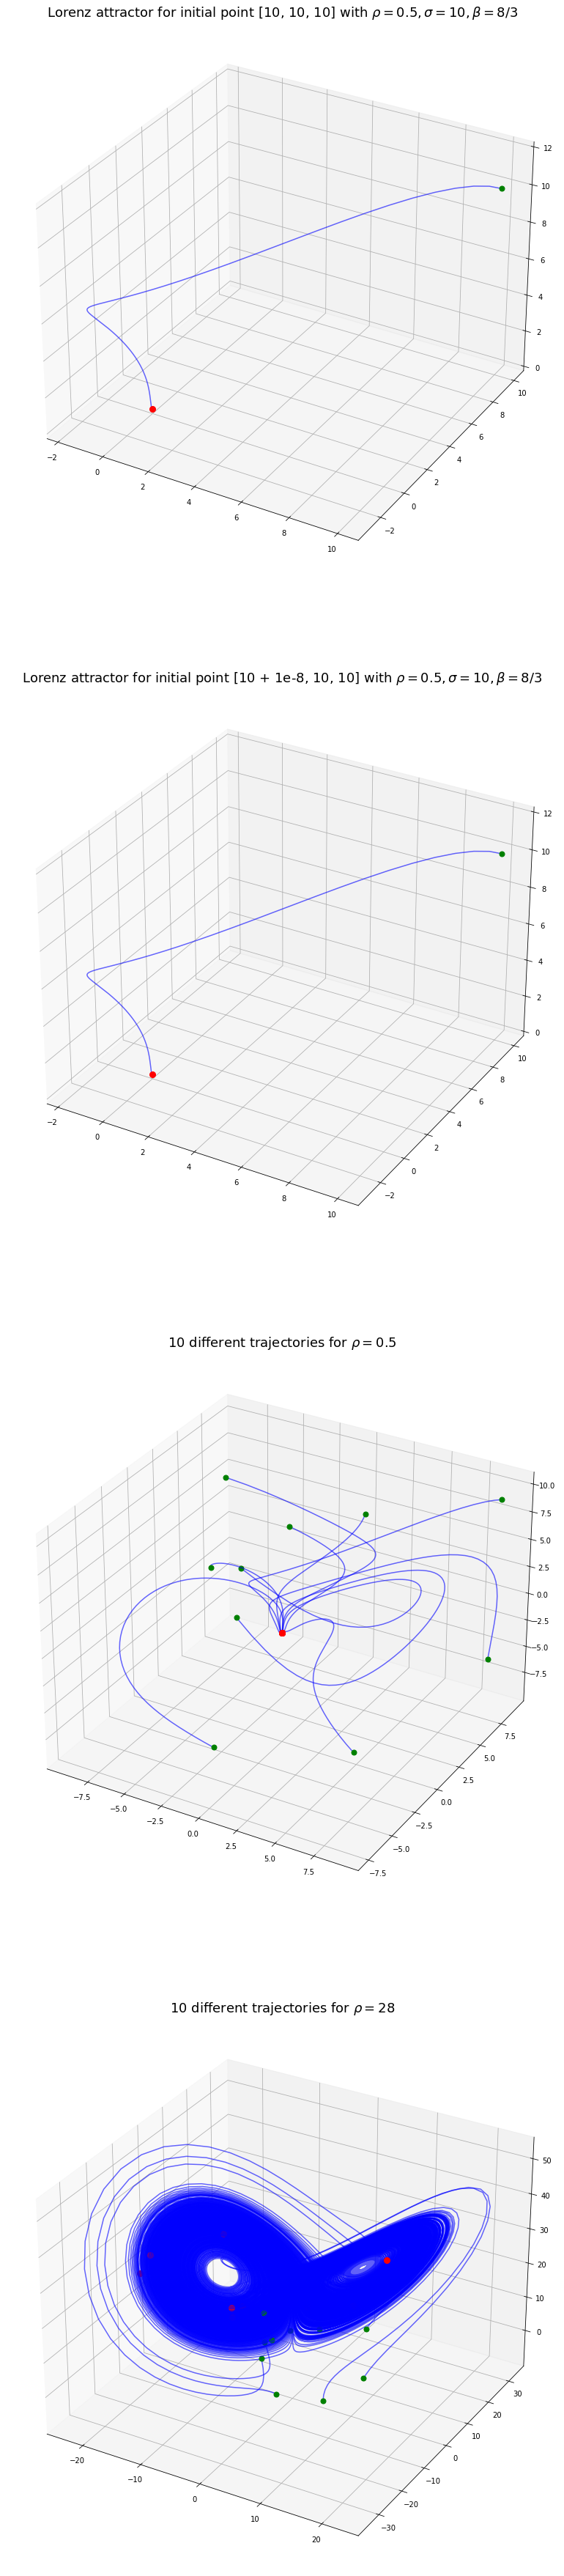

In [11]:
rho = 0.5

fig = plt.figure(figsize=(48, 64))

ax0 = fig.add_subplot(4, 1, 1, projection='3d')
ax1 = fig.add_subplot(4, 1, 2, projection='3d')
ax2 = fig.add_subplot(4, 1, 3, projection='3d')
ax3 = fig.add_subplot(4, 1, 4, projection='3d')

# Starting point for the first case [10, 10, 10]
simulation(rho, sigma, beta, ax=ax0)
ax0.set_title(r"Lorenz attractor for initial point [10, 10, 10] with ${\rho = 0.5}, {\sigma=10}, {\beta=8/3}$", fontsize=18)

# Starting point for the perturbed first case [10 + 10^-8, 10, 10]

simulation(rho, sigma, beta, ax=ax1, st_init = [10 + 0.00000001, 10, 10])
ax1.set_title(r"Lorenz attractor for initial point [10 + 1e-8, 10, 10] with ${\rho = 0.5}, {\sigma=10}, {\beta=8/3}$",fontsize=18)

# For 10 different starting points with rho value 0.5 and 28.
    
initial_points = [
                 [-2, 4, 6],
                 [9, 8, -5],
                 [6, -2, -7],
                 [-8, 8, -3],
                 [0, -7, -5],
                 [3, 4, 9],
                 [-2, -4, 8],
                 [-9, 9, -9],
                 [-7, 5, 8],
                 [9, 9, 9]
                 ]

ax2.set_title(r"10 different trajectories for ${\rho = 0.5}$",fontsize=18)
ax3.set_title(r"10 different trajectories for ${\rho = 28}$",fontsize=18)

for j in range(len(initial_points)):
    simulation(0.5, sigma, beta, ax=ax2,  st_init=initial_points[j])
    simulation(28, sigma, beta, ax=ax3, st_init=initial_points[j])

### In the first two plot, we have shown that the with the same $\rho=0.5$ value, there is a small perturbation of the orbits occur. In the next, we have 10 same initial points with two different $\rho$ values : 0.5 and 28 respectively.  We can see multiple end points for the orbits when the $\rho$ value is 28.